In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [14]:
df = pd.read_csv('/content/house_price.csv')

In [15]:
df.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0


In [16]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

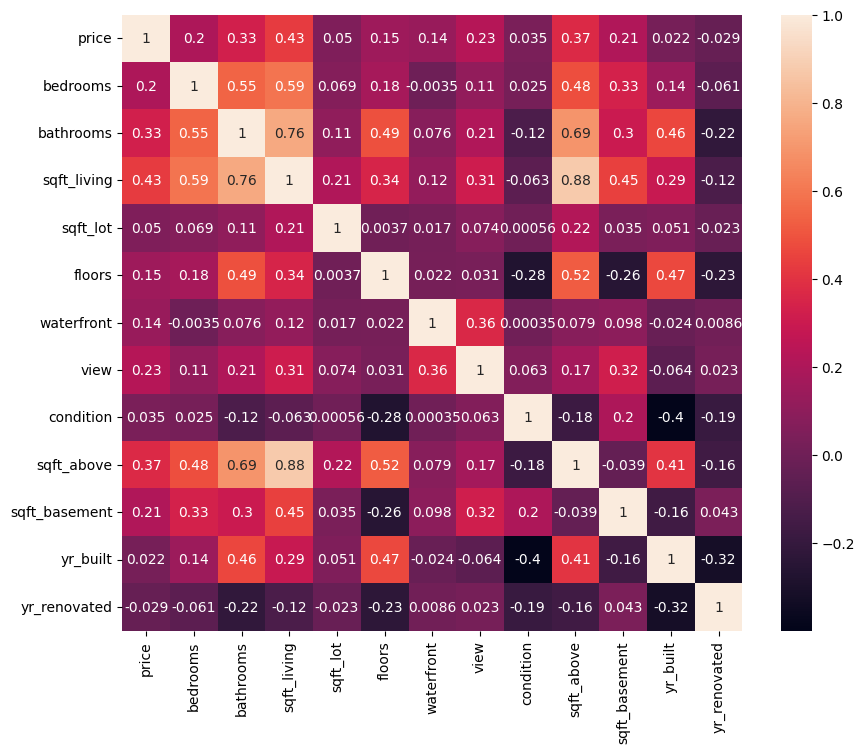

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot= True)
plt.show()

In [20]:
# split data into training and testing
x = df.iloc[:, 1::]
y = df['price']

In [21]:
sc = StandardScaler()
sc.fit(x)

StandardScaler()

In [22]:
x = pd.DataFrame(sc.transform(x), columns= x.columns)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.20, random_state = 42 )

In [56]:
# using the metrics we difine which one have less errors

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [32]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

# Linear regrassion

In [33]:
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_test, y_test)*100

3.228385663270661

In [58]:
print(mean_squared_error(y_test, lr.predict(x_test)))
print(mean_absolute_error(y_test, lr.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test, lr.predict(x_test)))))

986921767056.1217
210908.17324983896
993439.3625461605


# Lasso

In [47]:
ls = Lasso(alpha=0.05).fit(x_train, y_train)
print(ls.score(x_test, y_test) * 100)

3.2283832349412123


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.068e+13, tolerance: 5.229e+10
  model = cd_fast.enet_coordinate_descent(


In [59]:
print(mean_squared_error(y_test, ls.predict(x_test)))
print(mean_absolute_error(y_test, ls.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test, ls.predict(x_test)))))

986921791821.3508
210908.17937886194
993439.3750105493


# Ridge


In [48]:
rg = Ridge(alpha= 0.005)
rg.fit(x_train, y_train)
rg.score(x_test, y_test)*100

3.2283916358173625

In [60]:
print(mean_squared_error(y_test, rg.predict(x_test)))
print(mean_absolute_error(y_test, rg.predict(x_test)))
print(np.sqrt((mean_squared_error(y_test, rg.predict(x_test)))))

986921706145.3229
210908.12688672828
993439.3318896343


In [61]:
df_ = pd.DataFrame({'col_name' : x.columns,'Linear_regrassion': lr.coef_ , 'Lasso': ls.coef_ ,'Ridge': rg.coef_})

In [62]:
df_

,col_name,Linear_regrassion,Lasso,Ridge
0,bedrooms,-58612.024508,-58611.962312,-58611.719611
1,bathrooms,28620.918763,28620.582550,28621.049472
2,sqft_living,137630.254184,293768.921872,137629.979795
3,sqft_lot,-18457.455542,-18457.398224,-18457.375761
4,floors,37581.760408,37581.776751,37581.691516
5,waterfront,32277.529439,32277.496799,32277.522809
6,view,34834.371398,34834.352126,34834.439140
7,condition,19864.740960,19864.658876,19864.744263
8,sqft_above,120697.088701,-19062.849901,120696.850475
9,sqft_basement,61415.300124,-13822.522485,61415.173064
